# Problem 1

## Part 1

Using the avialable files here, create *all* pairs of photons with the same event number.  This means that you create all possible pairs of photons within the same event and you do this for each event.  If the event contains 4 photons there are six photon pairs: AB, AC, AD, BC, BD, BC (the order doesn't matter).  Two of these pairs are from real pions and 4 are combinatoric.  If you have 1000 events with 4 photons each, you have 2000 real photons and 4000 combinatoric pairs.  Some of those combinatoric pairs will have a mass near the pion mass and some will be far away.

You will notice that the files contain different numbers of photons per event and this will change the ratio of pions to background pairs.  Histogram the mass distribution with an appropriate binning.  Make a plot of the mass distribution for each data set.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
# Read data, here we use pandas and read the files as dataframes for latter operations
data_1 = pd.read_csv('pi0s_1.txt', sep='\s+', header=0, names=['event_number', "px", "py", "pz", "E"])
data_5 = pd.read_csv('pi0s_5.txt', sep='\s+', header=0, names=['event_number', "px", "py", "pz", "E"])
data_25 = pd.read_csv('pi0s_25.txt', sep='\s+', header=0, names=['event_number', "px", "py", "pz", "E"])

In [4]:
# You can check that for data_1, there are only 1 pions in each event so only two photons with the same event_number
# get the headers of the dataframe
data_5.columns

Index(['event_number', 'px', 'py', 'pz', 'E'], dtype='object')

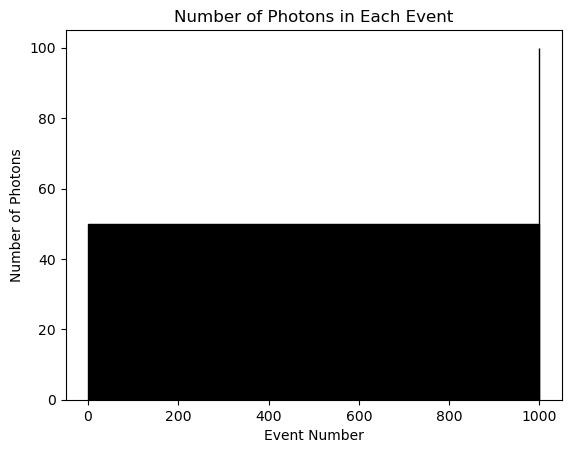

In [5]:
# Plot the number of photons in each event
plt.hist(data_25['event_number'], bins=range(1, 1001), edgecolor='black')
plt.xlabel('Event Number')
plt.ylabel('Number of Photons')
plt.title('Number of Photons in Each Event')
plt.show()

Define a function to calculate the invairant masses of possible photon pairs.
Hint: Use "groupby" to group the data by *event_number*, and for entries with the same *event_number*, use "np.triu_indices" to avoid slow for loop and get possible combinators

In [6]:
def calculate_invariant_mass_pairs(data):
    """
    Calculate the invariant mass for each photon pair in the dataset.
    
    Parameters
    ----------
    data : pandas.DataFrame
        DataFrame containing photon data with columns: 'event_number', 'E', 'px', 'py', 'pz'.
    
    Returns
    -------
    mass_list : list of floats
        List of invariant mass values for each photon pair.
    """
    mass_list = []
    
    # Group the data by event_number
    grouped = data.groupby('event_number')
    
    # Loop over each event with a progress bar
    for _, group in tqdm(grouped, desc="Processing events"):
        # We expect at least two photons per event
        if len(group) < 2:
            continue

        # Extract the columns of interest as a NumPy array
        # The columns order is: E, px, py, pz.
        arr = group[['E', 'px', 'py', 'pz']].values
        n = arr.shape[0]
        
        # Get indices for the upper triangle of an n x n matrix (excluding diagonal)
        i, j = np.triu_indices(n, k=1)
        
        # Sum the energies and momenta for each photon pair
        E_sum  = arr[i, 0] + arr[j, 0]
        px_sum = arr[i, 1] + arr[j, 1]
        py_sum = arr[i, 2] + arr[j, 2]
        pz_sum = arr[i, 3] + arr[j, 3]
        
        # Compute the invariant mass squared for all pairs
        mass_sq = E_sum**2 - (px_sum**2 + py_sum**2 + pz_sum**2)
        masses_event = np.sqrt(np.clip(mass_sq, 0, None))
        
        mass_list.extend(masses_event.tolist())
        
    return mass_list


In [7]:
masses_1 = calculate_invariant_mass_pairs(data_1)
masses_5 = calculate_invariant_mass_pairs(data_5)
masses_25 = calculate_invariant_mass_pairs(data_25)

Processing events: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:00<00:00, 2590.68it/s]


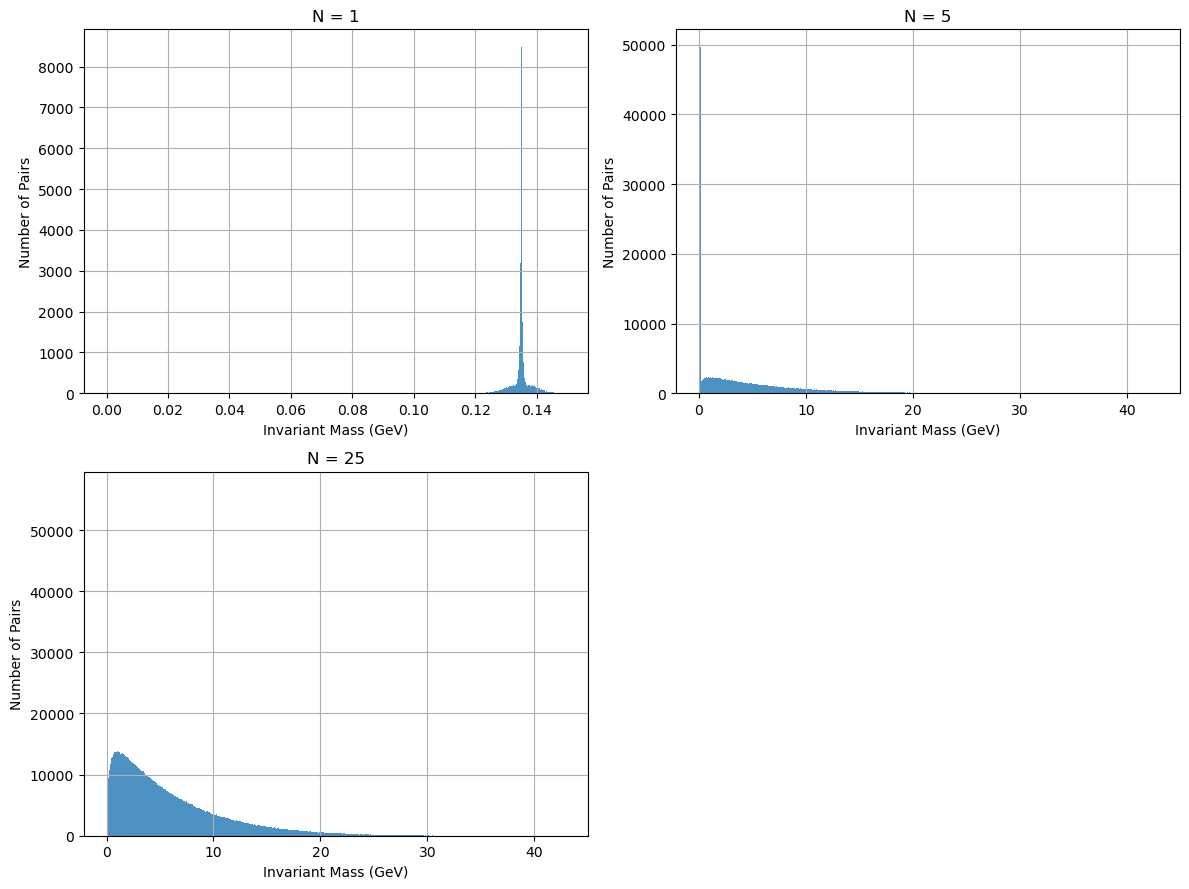

In [8]:
# Plot the invariant mass histogram
plt.figure(figsize=(12, 9))

plt.subplot(2, 2, 1)
plt.hist(masses_1, bins=1000, alpha=0.8)
# set the x-axis range to(0.12, 0.15)
# plt.xlim(0.12, 0.15)
plt.xlabel('Invariant Mass (GeV)')
plt.ylabel('Number of Pairs')
plt.title('N = 1')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.hist(masses_5, bins=1000, alpha=0.8)
# set the x-axis range to(0.12, 0.15)
# plt.xlim(0.12, 0.15)
plt.xlabel('Invariant Mass (GeV)')
plt.ylabel('Number of Pairs')
plt.title('N = 5')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.hist(masses_25, bins=1000, alpha=0.8)
# set the x-axis range to(0.12, 0.15)
# plt.xlim(0.12, 0.15)
plt.xlabel('Invariant Mass (GeV)')
plt.ylabel('Number of Pairs')
plt.title('N = 25')
plt.grid(True)

plt.tight_layout()
plt.show()

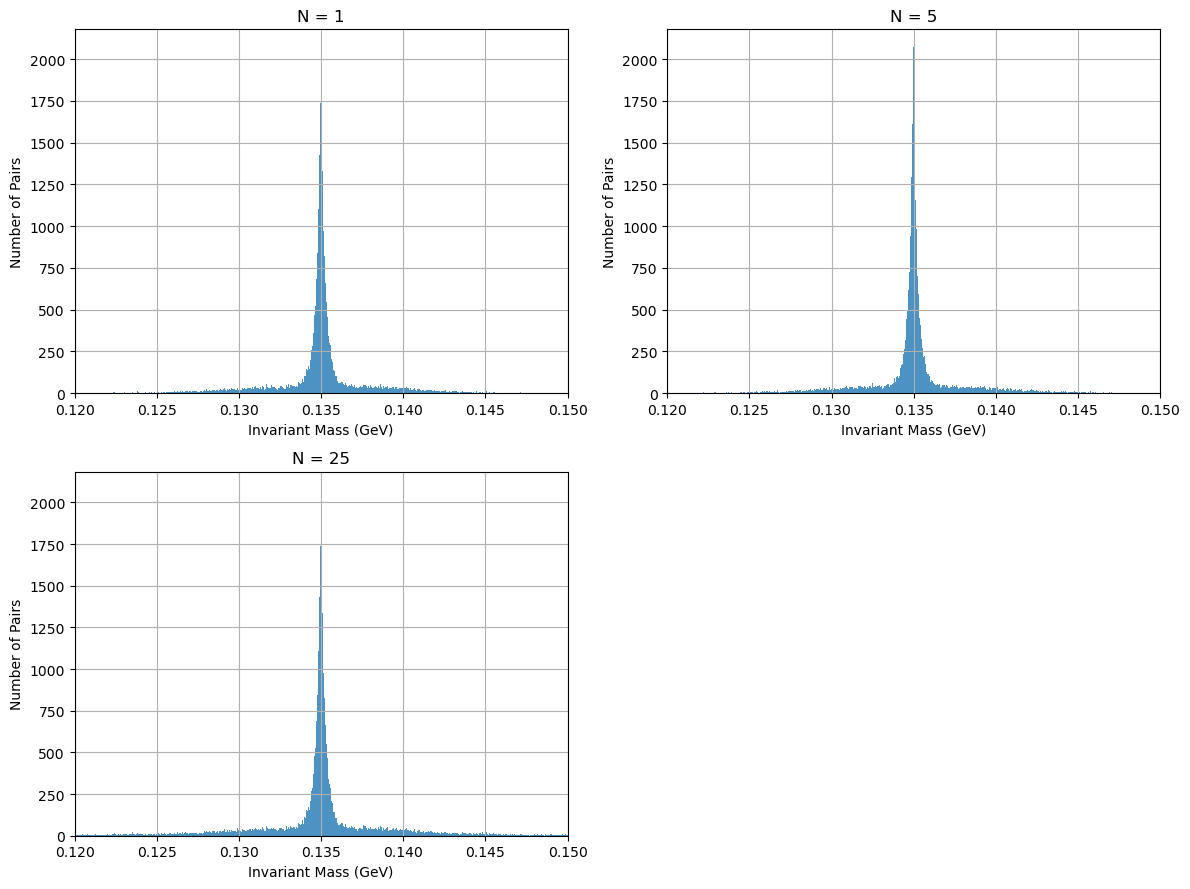

In [9]:
# Define the bins: 1000 bins from 0.12 to 0.15
bins = np.linspace(0.12, 0.15, 1001)

# Plot the invariant mass histogram
plt.figure(figsize=(12, 9))

plt.subplot(2, 2, 1)
plt.hist(masses_1, bins=bins, alpha=0.8)
plt.xlim(0.12, 0.15)
plt.xlabel('Invariant Mass (GeV)')
plt.ylabel('Number of Pairs')
plt.title('N = 1')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.hist(masses_5, bins=bins, alpha=0.8)
plt.xlim(0.12, 0.15)
plt.xlabel('Invariant Mass (GeV)')
plt.ylabel('Number of Pairs')
plt.title('N = 5')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.hist(masses_25, bins=bins, alpha=0.8)
plt.xlim(0.12, 0.15)
plt.xlabel('Invariant Mass (GeV)')
plt.ylabel('Number of Pairs')
plt.title('N = 25')
plt.grid(True)

plt.tight_layout()
plt.show()

## Part 2

Look at the histograms.  If the mass of a photon pair is far from the pion mass, it probably didn't come from a pion.  However, if the mass is near the pion mass, either it came from a pion or it is a combinatoric pair.  

Find a function to fit the invariant mass distribution. What is the signal to background in the region of the pion mass (answering this question requires defining a region around the pion mass to calculate your signal; make sure you provide some justification for your definition).

Requirement: state your signal and background model, plot the invariant mass distribution and fit result, clarify your region definition, and give signal to background ratio in that region.

In [11]:
!pip install iminuit

  Obtaining dependency information for iminuit from https://files.pythonhosted.org/packages/38/bc/a3386afa6046b187b9a5063009b87b1972885c834877beb7f3e700d52312/iminuit-2.30.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 8.0 MB/s eta 0:00:00a 0:00:01


In [24]:
from iminuit import Minuit
from scipy.special import erf

def fit_signal_background(mass_list, mass_min, mass_max, n_bins, make_plot=True):
    """
    Fit the invariant mass histogram using a Breit-Wigner signal plus linear background,
    and return the estimated signal and background counts in the signal region.
    """

    # Implement your code below
    # Create the histogram from mass_list
    counts, bin_edges = np.histogram(mass_list, bins=n_bins, range=(mass_min, mass_max))
    bin_width = (bin_edges[-1] - bin_edges[0]) / n_bins
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    
    # Define the fit function
    def fit_function(m, A, m0, Gamma, B0, B1):
        signal = A * Gamma**2 / ((m - m0)**2 + (Gamma**2)/4)
        background = B0 + B1 * m
        return signal + background

    # Define the chi-square function to minimize.
    def chi2(A, m0, Gamma, B0, B1):
        model = fit_function(bin_centers, A, m0, Gamma, B0, B1)
        # Use sqrt(max(count, 1)) to avoid zero uncertainty
        error = np.sqrt(np.maximum(counts, 1))
        return np.sum(((counts - model) / error)**2)
    
    # Implement the Minuit fitting below
    # --- Define the signal region ---
    m_low = mass_min
    m_high = mass_max
    m = Minuit(chi2, A=1000, m0=0.135, Gamma=0.005, B0=10, B1=0)
    m.migrad()
    
    # Print the fitted parameter values:
    print("Fitted parameters:")
    print(m.hesse())

    if make_plot:
        # Plot the histogram with error bars and the fitted function:
        plt.figure(figsize=(8,6))
        plt.errorbar(bin_centers, counts, yerr=np.sqrt(np.maximum(counts, 1)), fmt='o', label='Data')
        # Fine grid for plotting the fit function
        m_fine = np.linspace(mass_min, mass_max, 1000)
        plt.plot(m_fine, fit_function(m_fine, *m.values), 'r-', label='Fit')
        plt.xlabel("Invariant Mass (GeV)")
        plt.ylabel("Counts")
        plt.title("Invariant Mass Distribution with Signal+Background Fit")
        plt.legend()
        plt.grid(True)
        plt.show()

    # Total data counts in the signal region (summing histogram bins)
    region_mask = (bin_centers >= m_low) & (bin_centers <= m_high)
    N_total = np.sum(counts[region_mask])
    
    # Estimate the background counts in the signal region by integrating the background function:
    B0_fit = m.values["B0"]
    B1_fit = m.values["B1"]
    # Analytical integration of B0+B1*m over m_low to m_high:
    B = B0_fit*(m_high - m_low) + 0.5 * B1_fit * (m_high**2 - m_low**2)
    
    # Then, the estimated signal counts are the excess counts:
    S = N_total - B
    
    # Return the Siganl and Background counts
    return S, B

## Signal Model: Breit-Wigner 
## Background Model: Linear model  
## Signal region was chosen to be (0.12, 0.15) to fully accomodate the signal peak while letting in some background  

Fitted parameters:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 6503                       │              Nfcn = 380              │
│ EDM = 4.72e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬──────

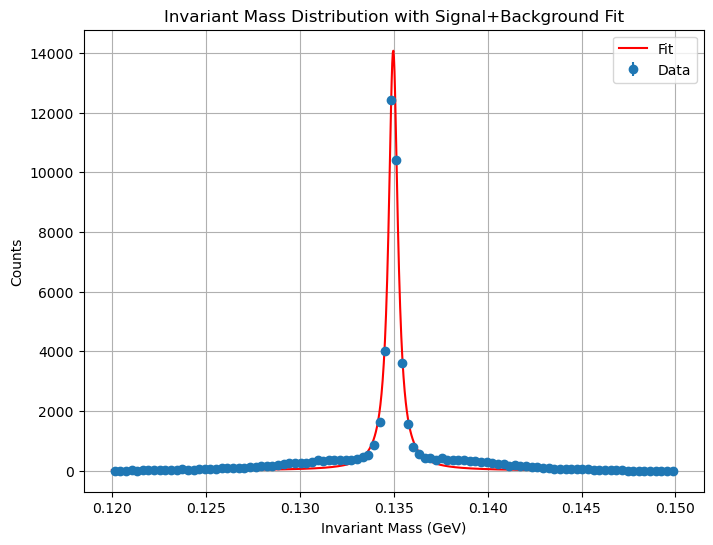

N=1, S=49872.78, B=0.22, S/B=224364.61, uncertainty=0.4478%
Fitted parameters:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 5551                       │              Nfcn = 341              │
│ EDM = 2.19e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────

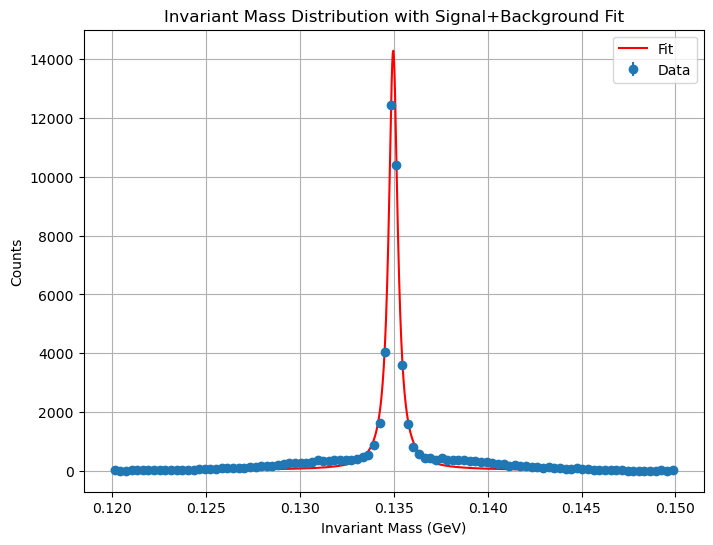

N=5, S=50768.09, B=0.91, S/B=55614.96, uncertainty=0.4438%
Fitted parameters:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 4040                       │              Nfcn = 333              │
│ EDM = 5.56e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬─────

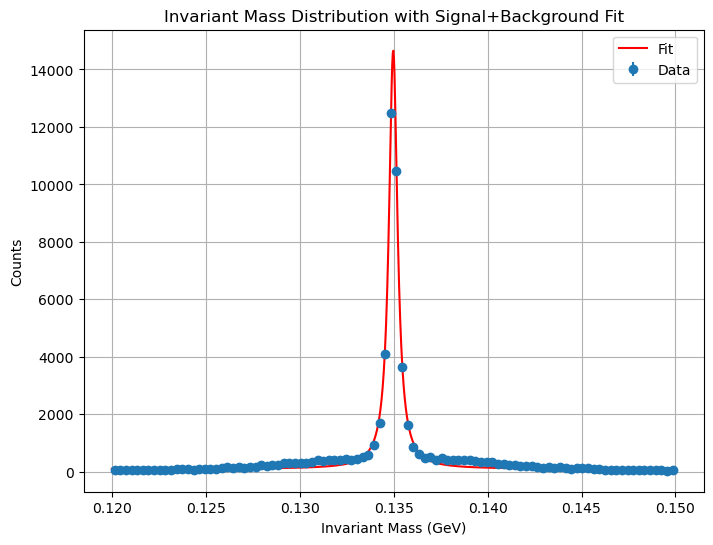

N=25, S=55448.01, B=2.99, S/B=18517.90, uncertainty=0.4247%


In [25]:
mass_dict = {'N=1': masses_1,
             'N=5': masses_5,
             'N=25': masses_25
            }
for key in mass_dict.keys():
    S, B = fit_signal_background(mass_dict[key], 0.12, 0.15, 100)
    print (f'{key}, S=%.2f, B=%.2f, S/B=%.2f, uncertainty=%.4f%%'%(S, B, S/B, 100*np.sqrt(S+B)/S))

## Part 3

Find the number of pions in each of the histograms (making sure to remove the background).  How does the precision of the number of pions vary with the signal to background?  Explain what you find.

The number of pions in each histogram is just the number of signals:  
N=1, S=49872.78  
N=5, S=50768.09  
N=25, S=55448.01  

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 101.61it/s]


Fitted parameters:
<ValueView A=834.0762299238495 m0=0.13497933533361192 Gamma=0.00042936811130034157 B0=-95.60288403872 B1=1024.1013403008917>
Fitted parameters:
<ValueView A=1011.6604712003522 m0=0.13497924824008606 Gamma=0.00042467532205239653 B0=-66.98065944348055 B1=919.9581441386399>
Fitted parameters:
<ValueView A=1189.018136767976 m0=0.13497888052110954 Gamma=0.0004220947067887982 B0=-26.47693677411597 B1=723.8762407046931>
Fitted parameters:
<ValueView A=1362.5464594683183 m0=0.13497850871315403 Gamma=-0.00042347782452900487 B0=-63.542070171328604 B1=1073.0989492005717>
Fitted parameters:
<ValueView A=1532.8446702983965 m0=0.13497840237813807 Gamma=0.00042613620323547465 B0=-20.472808188908107 B1=823.424263645074>
Fitted parameters:
<ValueView A=1695.736108228341 m0=0.13497874957294567 Gamma=-0.00043199113161034296 B0=39.190534067637174 B1=419.0194984293163>
Fitted parameters:
<ValueView A=1851.4745020316902 m0=0.13497913351370608 Gamma=0.0004406209895364734 B0=55.806457026283

 40%|██████████████████████████████████████████████████████▍                                                                                 | 8/20 [00:00<00:00, 36.47it/s]

Fitted parameters:
<ValueView A=834.011664630241 m0=0.13497931107695219 Gamma=0.00042932110946109696 B0=-83.2573114112847 B1=945.9482666957974>
Fitted parameters:
<ValueView A=1011.4476388462282 m0=0.134979229112983 Gamma=0.0004247073060446449 B0=-66.63192374530367 B1=933.8559222344772>
Fitted parameters:
<ValueView A=1188.6422264087444 m0=0.13497886624547145 Gamma=-0.00042226448338086815 B0=-21.28391124841596 B1=703.7122005950837>
Fitted parameters:
<ValueView A=1348.8343513170514 m0=0.13497903860316557 Gamma=-0.00042471767068363587 B0=-58.55035617335949 B1=1064.6475276413844>
Fitted parameters:
<ValueView A=1532.7129860946434 m0=0.13497837732916698 Gamma=-0.00042604999816081205 B0=-18.881397317270256 B1=837.0185240663666>
Fitted parameters:
<ValueView A=1695.4947233068076 m0=0.13497869902778892 Gamma=-0.00043197294383675444 B0=26.437192338245172 B1=541.1472431018668>
Fitted parameters:
<ValueView A=1851.8617685787185 m0=0.1349790672956566 Gamma=0.0004402511224973588 B0=39.02225423274

 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 17/20 [00:00<00:00, 38.94it/s]

Fitted parameters:
<ValueView A=2297.2831854605442 m0=0.13497824067939349 Gamma=0.00047062483641278354 B0=83.3114122159532 B1=78.95653110952881>
Fitted parameters:
<ValueView A=2440.1439763318162 m0=0.13497816713688396 Gamma=0.0004798242722579785 B0=99.39436579010902 B1=-61.24075543942208>
Fitted parameters:
<ValueView A=2573.7985845099965 m0=0.13497783323324763 Gamma=0.0004915756708216335 B0=65.68577508754795 B1=140.78545440040796>
Fitted parameters:
<ValueView A=2716.4537984278827 m0=0.13497747208407035 Gamma=0.0005000460597136507 B0=27.151666889807643 B1=391.0920239520551>
Fitted parameters:
<ValueView A=2837.2374891962095 m0=0.13497745042944365 Gamma=0.0005142976155555159 B0=58.8620734582885 B1=73.78924816195448>
Fitted parameters:
<ValueView A=2960.6892343388226 m0=0.1349772187415868 Gamma=0.0005256364818420305 B0=61.88268124923435 B1=0.5547543192765936>
Fitted parameters:
<ValueView A=3080.1236095131467 m0=0.13497734850118395 Gamma=0.0005377559959803289 B0=120.17363563312031 B1=-

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 37.16it/s]


Fitted parameters:
<ValueView A=3440.7363614932465 m0=0.13497701290825456 Gamma=0.0005669868438751411 B0=100.69335528884561 B1=-492.922085933634>
Fitted parameters:
<ValueView A=3566.307548214128 m0=0.13497678648112046 Gamma=0.0005741216973802132 B0=81.11438155595475 B1=-375.4523508254375>


  5%|██████▊                                                                                                                                 | 1/20 [00:00<00:01,  9.98it/s]

Fitted parameters:
<ValueView A=832.6378352009934 m0=0.13497917590629546 Gamma=0.00043036109954209476 B0=-67.61340890884031 B1=897.469475930965>


 15%|████████████████████▍                                                                                                                   | 3/20 [00:00<00:01, 10.39it/s]

Fitted parameters:
<ValueView A=1009.2478868722549 m0=0.13497908782395962 Gamma=0.00042628450248816796 B0=-54.86921629088331 B1=926.5289021776883>
Fitted parameters:
<ValueView A=1186.2898052516732 m0=0.13497869605473875 Gamma=-0.0004235519831199789 B0=-19.442458061514007 B1=786.2670907897623>
Fitted parameters:
<ValueView A=1359.1870995160727 m0=0.13497828987191182 Gamma=-0.0004250595090366726 B0=-66.8727508379909 B1=1229.409919277303>


 30%|████████████████████████████████████████▊                                                                                               | 6/20 [00:00<00:01,  9.49it/s]

Fitted parameters:
<ValueView A=1529.6334540017979 m0=0.1349781824870772 Gamma=-0.00042725063402253337 B0=-39.59666194823706 B1=1117.5640758218635>
Fitted parameters:
<ValueView A=1692.6125069336379 m0=0.13497854383392446 Gamma=-0.0004329178105619912 B0=37.10978759718277 B1=604.5344877762874>
Fitted parameters:
<ValueView A=1850.8166989979015 m0=0.13497888257150678 Gamma=0.000440091610826465 B0=55.2602648092642 B1=510.644249128588>


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 10/20 [00:01<00:00, 10.17it/s]

Fitted parameters:
<ValueView A=2003.795538824118 m0=0.13497831610080255 Gamma=0.00044880647242762713 B0=86.55660219947859 B1=299.39468770294224>
Fitted parameters:
<ValueView A=2153.742391942478 m0=0.13497804143375508 Gamma=0.00045863909440064436 B0=68.53121281939563 B1=423.9667207681746>
Fitted parameters:
<ValueView A=2302.1178997446254 m0=0.13497798414993348 Gamma=0.00046770747888045524 B0=107.47931374015485 B1=127.59385391091857>


 60%|█████████████████████████████████████████████████████████████████████████████████                                                      | 12/20 [00:01<00:00, 10.16it/s]

Fitted parameters:
<ValueView A=2449.7070204715988 m0=0.1349778969393886 Gamma=0.0004749393456593291 B0=104.91158523882632 B1=157.50905892138806>
Fitted parameters:
<ValueView A=2587.1562601939627 m0=0.1349775468390189 Gamma=0.00048518298830337866 B0=109.1034972568144 B1=107.84474856837471>
Fitted parameters:
<ValueView A=2734.8672425300315 m0=0.13497718412492732 Gamma=0.0004920474048293589 B0=81.77885859367376 B1=304.36125953726975>
Fitted parameters:
<ValueView A=2865.479942375907 m0=0.13497705213311964 Gamma=0.0005028029771810389 B0=73.84828580193503 B1=325.44397190514513>


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 16/20 [00:01<00:00, 10.08it/s]

Fitted parameters:
<ValueView A=2996.1494841051176 m0=0.13497683804795343 Gamma=0.0005121869982482321 B0=103.11183410826231 B1=88.00265309930396>
Fitted parameters:
<ValueView A=3127.704236045307 m0=0.13497690353228284 Gamma=0.0005209457213904374 B0=106.3977814620082 B1=34.250940035036734>
Fitted parameters:
<ValueView A=3245.688831169303 m0=0.13497670481815266 Gamma=0.0005319054180539053 B0=136.98756291723592 B1=-222.41713776370614>


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 19/20 [00:01<00:00,  9.88it/s]

Fitted parameters:
<ValueView A=3377.67322557289 m0=0.1349767111782565 Gamma=0.000539373403730293 B0=129.07481509762403 B1=-188.12592021907267>
Fitted parameters:
<ValueView A=3510.9143769731645 m0=0.1349766858439337 Gamma=0.0005456854077794765 B0=111.1741051508036 B1=-64.08631553003401>
Fitted parameters:
<ValueView A=3641.237258845574 m0=0.13497654305825466 Gamma=0.0005527171930785654 B0=118.42065534774575 B1=-137.85873693624592>


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:02<00:00,  9.94it/s]


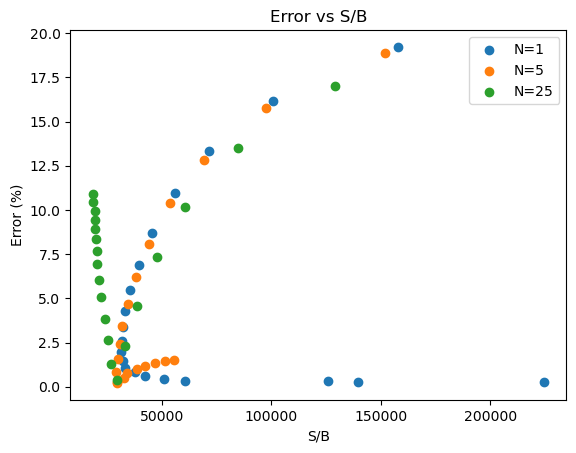

In [23]:
# Generate 20 values for the lower edge from 0.132 to 0.12
low_edges = np.linspace(0.132, 0.12, 20)
# Generate 20 values for the upper edge from 0.138 to 0.15
high_edges = np.linspace(0.138, 0.15, 20)

# Zip them into a list of tuples
ranges = list(zip(low_edges, high_edges))

results_dict = {'N=1': [],
             'N=5': [],
             'N=25': []
            }
# loop over the ranges, for each data file, store a list of signal precisions (percent error of S from the true value 50000), and a list of corresponding s/b. Then plot precision over s/b.
true_S = 50000
for key in mass_dict.keys():
    for low, high in tqdm(ranges):
        S, B = fit_signal_background(mass_dict[key], low, high, 100, make_plot=False)
        precision = 100 * abs(S - true_S) / true_S
        s_b = S / B
        results_dict[key].append((precision, s_b))

# plot precision over s/b
for key in results_dict.keys():
    precisions, s_bs = zip(*results_dict[key])
    plt.scatter(s_bs, precisions, label=key)
plt.xlabel('S/B')
plt.ylabel('Error (%)')
plt.title('Error vs S/B')
plt.legend()
plt.savefig('error_vs_sb.png')
plt.show()

### Conclusion

From the plot above, we observe that the relative error—defined as

$$
\frac{S - S_{\text{true}}}{S_{\text{true}}}
$$

—increases as the signal-to-background ratio (S/B) increases. In other words, the precision of the signal measurement decreases when the S/B ratio is higher.
